In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'C:/Users/kevda/Desktop/ex_github/Data-Science-for-Marketing-Analytics/orders-2023-03-07-18-54-12.csv')
df

,Order Number,Order Date,First Name (Billing),Last Name (Billing),Customer first order date,Customer last order date,City (Billing),Payment Method Title,Cart Discount Amount,Shipping Method Title,Order Shipping Amount,Order Refund Amount,Order Total Amount,Order Total Tax Amount,Item #,Item Name,Quantity,Item Cost
0,2023417,2023-03-06,Marinella,Maestri,2022-01-31,2023-03-06,Cortefranca,Carta di Credito,"0,00",Costi di spedizione,"5,00","0,00","66,20","0,00",1,NEOGELA barattolo 400 gr,1,"61,20"
1,2023416,2023-03-06,Liliana,Sciarretta,2023-03-06,2023-03-06,Guidonia Montecelio,PayPal,"0,00",Costi di spedizione (Spedizione gratuita),"0,00","0,00","122,40","0,00",1,NEOGELA barattolo 400 gr,2,"61,20"
2,2023415,2023-03-06,ADRISA,BUCI,2022-03-13,2023-03-06,GENOVA,Carta di Credito,"0,00",Costi di spedizione (Spedizione gratuita),"0,00","0,00","122,40","0,00",1,NEOGELA barattolo 400 gr,2,"61,20"
3,2023414,2023-03-06,carlo,conversi,2023-03-06,2023-03-06,Guidonia Montecelio,Bonifico bancario,"0,00",Costi di spedizione,"5,00","0,00","66,20","0,00",1,NEOGELA barattolo 400 gr,1,"61,20"
4,2023413,2023-03-05,Maria,Lucia,2021-12-28,2023-03-05,DESENZANO DEL GARDA,Carta di Credito,"0,00",Costi di spedizione (Spedizione gratuita),"0,00","0,00","91,10","0,00",1,NEOGELA scatola 28 buste 5 gr,1,"29,90"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,20211703,2022-01-03,donatella,mingotti,2022-01-03,2023-02-14,imola,Pagamento PayPal,"0,00",Spedizione gratuita,"0,00","0,00","118,08","0,00",1,NEOGELA barattolo 400 gr,2,"59,04"
2930,20211702,2022-01-02,Angela,maria Mele,2022-01-02,2022-04-13,gussago,Pagamento PayPal,"0,00",Spedizione gratuita,"0,00","0,00","118,08","0,00",1,NEOGELA barattolo 400 gr,2,"59,04"
2931,20211701,2022-01-02,Paolo,Lunghi,2022-01-02,2022-01-02,Orbetello,Carta di Credito,"0,00",Spedizione gratuita,"0,00","0,00","172,80","0,00",1,3 NEOGELA + 15 BUSTE + 1 REGALO,1,"172,80"
2932,20211700,2022-01-02,RICCARDO,RUSSO,2022-01-02,2022-10-28,BERNALDA,Google Pay (Stripe),"0,00",Spedizione gratuita,"0,00","0,00","54,40","0,00",1,NEOGELA scatola 28 buste 5 gr,2,"27,20"


In [3]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Customer first order date']=pd.to_datetime(df['Customer first order date'])
df['Customer last order date']=pd.to_datetime(df['Customer last order date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934 entries, 0 to 2933
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order Number               2934 non-null   int64         
 1   Order Date                 2934 non-null   datetime64[ns]
 2   First Name (Billing)       2934 non-null   object        
 3   Last Name (Billing)        2934 non-null   object        
 4   Customer first order date  2934 non-null   datetime64[ns]
 5   Customer last order date   2934 non-null   datetime64[ns]
 6   City (Billing)             2934 non-null   object        
 7   Payment Method Title       2934 non-null   object        
 8   Cart Discount Amount       2934 non-null   object        
 9   Shipping Method Title      2926 non-null   object        
 10  Order Shipping Amount      2934 non-null   object        
 11  Order Refund Amount        2934 non-null   object        
 12  Order 

In [5]:
df = df.drop(['Cart Discount Amount','Order Total Tax Amount','Order Shipping Amount',
              'Order Refund Amount','Order Total Amount','Order Total Tax Amount','Item Name','Item #'],axis=1)

In [6]:
df['customerID']= df['First Name (Billing)']+ df['Last Name (Billing)']

In [7]:
df['customerID'].value_counts()

SergioDocali           12
MiriamFranco           10
cristinavallini        10
ColetteMorin            9
RosariaCondorelli       9
                       ..
LauraTommasin           1
CLAUDIACASANOVAS        1
BRUNONAPPINI            1
Maria TeresaGravina     1
GraziaSfregola          1
Name: customerID, Length: 1563, dtype: int64

In [8]:
clienti = df['customerID'].unique()

In [9]:
df['Item Cost']=df['Item Cost'].str.replace(',','.')

In [10]:
df['Item Cost']= df['Item Cost'].astype(float)

In [11]:
df['Revenue'] = df['Item Cost']*df['Quantity']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934 entries, 0 to 2933
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order Number               2934 non-null   int64         
 1   Order Date                 2934 non-null   datetime64[ns]
 2   First Name (Billing)       2934 non-null   object        
 3   Last Name (Billing)        2934 non-null   object        
 4   Customer first order date  2934 non-null   datetime64[ns]
 5   Customer last order date   2934 non-null   datetime64[ns]
 6   City (Billing)             2934 non-null   object        
 7   Payment Method Title       2934 non-null   object        
 8   Shipping Method Title      2926 non-null   object        
 9   Quantity                   2934 non-null   int64         
 10  Item Cost                  2934 non-null   float64       
 11  customerID                 2934 non-null   object        
 12  Revenu

In [13]:
op = {'Revenue':'sum',
     'Order Date':'first',
     'Customer first order date':'first',
      'Customer last order date':'first',
      'City (Billing)':'first',
      'Payment Method Title':'first',
      'Shipping Method Title':'first',
      'Quantity':'first',
      'customerID':'first'
      }
df = df.groupby('Order Number').agg(op)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 202201 to 20222361
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Revenue                    2518 non-null   float64       
 1   Order Date                 2518 non-null   datetime64[ns]
 2   Customer first order date  2518 non-null   datetime64[ns]
 3   Customer last order date   2518 non-null   datetime64[ns]
 4   City (Billing)             2518 non-null   object        
 5   Payment Method Title       2518 non-null   object        
 6   Shipping Method Title      2511 non-null   object        
 7   Quantity                   2518 non-null   int64         
 8   customerID                 2518 non-null   object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 196.7+ KB


<AxesSubplot:>

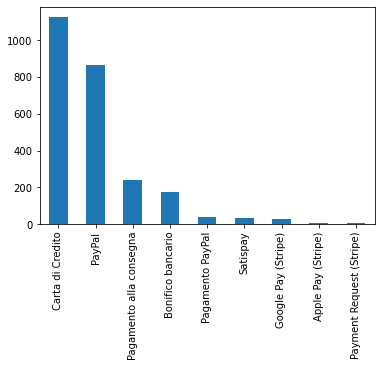

In [15]:
df['Payment Method Title'].value_counts().plot(kind='bar')

In [16]:
pay = df.groupby(by=['Payment Method Title'])['Revenue'].sum()

In [17]:
pay.sort_values(ascending=False)

Payment Method Title
Carta di Credito            109259.97
PayPal                       87240.60
Pagamento alla consegna      22881.08
Bonifico bancario            18130.75
Pagamento PayPal              3806.48
Satispay                      2926.64
Google Pay (Stripe)           2586.56
Payment Request (Stripe)      1028.16
Apple Pay (Stripe)             692.28
Name: Revenue, dtype: float64

In [18]:
df['Year'] = df['Order Date'].apply(lambda x:x.year)

In [19]:
df['Days'] = (pd.datetime(year=2022,month=12,day=31) - df['Order Date']).apply(lambda x:x.days)

<ipython-input-19-886d7610027c>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['Days'] = (pd.datetime(year=2022,month=12,day=31) - df['Order Date']).apply(lambda x:x.days)


In [20]:
df.head(5)

,Revenue,Order Date,Customer first order date,Customer last order date,City (Billing),Payment Method Title,Shipping Method Title,Quantity,customerID,Year,Days
Order Number,,,,,,,,,,,
202201,61.20,2022-01-04,2022-01-04,2022-12-14,Catania,Carta di Credito,Spedizione gratuita,1,SoniaFortunato,2022,361
202202,118.08,2022-01-04,2022-01-04,2022-07-14,Via Messina 39,Pagamento alla consegna,Spedizione gratuita,2,GiuseppaDi fiore,2022,361
202203,118.08,2022-01-05,2021-12-31,2023-01-26,Lecce,Pagamento PayPal,Spedizione gratuita,2,RabboniLucia,2022,360
202204,61.20,2022-01-05,2022-01-05,2022-01-05,Firenze,Carta di Credito,Spedizione gratuita,1,StefaniaViviani,2022,360
202205,61.20,2022-01-06,2022-01-06,2023-01-01,Legnago,Pagamento PayPal,Spedizione gratuita,1,SergioDocali,2022,359


In [21]:
op1 = {'Revenue':'sum',
      'Days':['min','max','nunique'],
      }
rfm= df[df['Year']==2022].groupby('customerID').agg(op1)
rfm.head(5)

Revenue Days             
                        sum  min  max nunique
customerID                                   
>ImmacolataGalatone  125.00  165  165       1
ALESSANDRADE ROSSI   122.40  106  270       2
ALESSANDRAGIORGI     122.40   20   92       2
ALESSANDRAMILETO     371.09   75  114       4
ALESSANDRAMORASCA     29.90  165  165       1

In [23]:
rfm.columns = [''.join(col).strip() for col in rfm.columns.values]
rfm.head(5)

,Revenuesum,Daysmin,Daysmax,Daysnunique
customerID,,,,
>ImmacolataGalatone,125.00,165,165,1
ALESSANDRADE ROSSI,122.40,106,270,2
ALESSANDRAGIORGI,122.40,20,92,2
ALESSANDRAMILETO,371.09,75,114,4
ALESSANDRAMORASCA,29.90,165,165,1


In [25]:
rfm['AOV']=round(rfm['Revenuesum']/rfm['Daysnunique'],2)
rfm

,Revenuesum,Daysmin,Daysmax,Daysnunique,AOV
customerID,,,,,
>ImmacolataGalatone,125.00,165,165,1,125.00
ALESSANDRADE ROSSI,122.40,106,270,2,61.20
ALESSANDRAGIORGI,122.40,20,92,2,61.20
ALESSANDRAMILETO,371.09,75,114,4,92.77
ALESSANDRAMORASCA,29.90,165,165,1,29.90
...,...,...,...,...,...
umbertofinazzi,67.70,5,5,1,67.70
valentinaarmati,61.20,3,3,1,61.20
vaniaperego,128.90,68,120,2,64.45


In [28]:
clientitop = rfm.groupby(by=['customerID']).sum()

In [29]:
clientitop=clientitop.nlargest(n=20,columns='Revenuesum')

In [30]:
clientitop

,Revenuesum,Daysmin,Daysmax,Daysnunique,AOV
customerID,,,,,
AnnaMassignan,1146.24,22,339,4,286.56
IsidePastori,993.60,71,348,5,198.72
andreaaliprandi,879.84,12,289,6,146.64
sciannagiovanni,865.16,75,315,7,123.59
MarialauraPancini,805.40,0,306,7,115.06
SILVANARIZZI,800.64,74,353,6,133.44
GabriellaSerci,781.58,113,336,4,195.40
enricavisani,778.34,17,263,6,129.72
SabrinaBertini,748.80,161,274,2,374.40


In [32]:
round(rfm['AOV'].mean(),2)

95.77

In [35]:
recency = rfm.groupby(['customerID']).agg('Daysmax')
recency.head()

customerID
>ImmacolataGalatone          165
ALESSANDRADE ROSSI           270
ALESSANDRAGIORGI              92
ALESSANDRAMILETO             114
ALESSANDRAMORASCA            165
                            ... 
umbertofinazzi                 5
valentinaarmati                3
vaniaperego                  120
vittoriopappacena            335
yuliyana ivanovazdravkova     66
Name: Daysmax, Length: 1360, dtype: int64

In [36]:
frequency = rfm.groupby(['customerID']).agg('Daysnunique')
frequency.head(5)

customerID
>ImmacolataGalatone          1
ALESSANDRADE ROSSI           2
ALESSANDRAGIORGI             2
ALESSANDRAMILETO             4
ALESSANDRAMORASCA            1
                            ..
umbertofinazzi               1
valentinaarmati              1
vaniaperego                  2
vittoriopappacena            1
yuliyana ivanovazdravkova    1
Name: Daysnunique, Length: 1360, dtype: int64

In [37]:
monetary = rfm.groupby(['customerID']).agg('Revenuesum')
monetary.head(5)

customerID
>ImmacolataGalatone          125.00
ALESSANDRADE ROSSI           122.40
ALESSANDRAGIORGI             122.40
ALESSANDRAMILETO             371.09
ALESSANDRAMORASCA             29.90
                              ...  
umbertofinazzi                67.70
valentinaarmati               61.20
vaniaperego                  128.90
vittoriopappacena             61.20
yuliyana ivanovazdravkova    118.08
Name: Revenuesum, Length: 1360, dtype: float64

In [39]:
monetary.dtype

customerID
>ImmacolataGalatone          float64
ALESSANDRADE ROSSI           float64
ALESSANDRAGIORGI             float64
ALESSANDRAMILETO             float64
ALESSANDRAMORASCA            float64
                              ...   
umbertofinazzi               float64
valentinaarmati              float64
vaniaperego                  float64
vittoriopappacena            float64
yuliyana ivanovazdravkova    float64
Name: Revenuesum, Length: 1360, dtype: object

In [43]:
matrix = rfm.drop(['Daysmin','AOV'],axis=1)
matrix

,Revenuesum,Daysmax,Daysnunique
customerID,,,
>ImmacolataGalatone,125.00,165,1
ALESSANDRADE ROSSI,122.40,270,2
ALESSANDRAGIORGI,122.40,92,2
ALESSANDRAMILETO,371.09,114,4
ALESSANDRAMORASCA,29.90,165,1
...,...,...,...
umbertofinazzi,67.70,5,1
valentinaarmati,61.20,3,1
vaniaperego,128.90,120,2


In [45]:
scaler = StandardScaler()
scaled= scaler.fit_transform(matrix)

C:\Users\kevda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


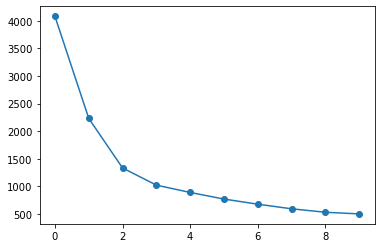

In [51]:
inertia=[]
for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
plt.plot(inertia,marker='o')

In [53]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
matrix['cluster']=(kmeans.labels_+1)
matrix

,Revenuesum,Daysmax,Daysnunique,cluster
customerID,,,,
>ImmacolataGalatone,125.00,165,1,2
ALESSANDRADE ROSSI,122.40,270,2,1
ALESSANDRAGIORGI,122.40,92,2,2
ALESSANDRAMILETO,371.09,114,4,3
ALESSANDRAMORASCA,29.90,165,1,2
...,...,...,...,...
umbertofinazzi,67.70,5,1,2
valentinaarmati,61.20,3,1,2
vaniaperego,128.90,120,2,2


In [57]:
group=round(matrix.groupby(['cluster'])['Revenuesum','Daysmax','Daysnunique'].mean(),2)
group

<ipython-input-57-b5e6e04d735b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group=round(matrix.groupby(['cluster'])['Revenuesum','Daysmax','Daysnunique'].mean(),2)


,Revenuesum,Daysmax,Daysnunique
cluster,,,
1,121.76,279.59,1.35
2,106.32,91.01,1.16
3,443.96,283.03,4.00


In [58]:
final = matrix['cluster'].value_counts()
final

2    631
1    575
3    154
Name: cluster, dtype: int64

<AxesSubplot:>

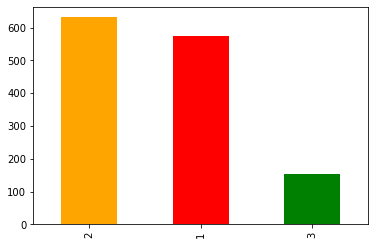

In [61]:
final.plot(kind='bar', color=['Orange','red','green'])

In [64]:
matrix.to_csv("RFM.csv")

In [65]:
clientitop.to_csv("clientitop.csv")

In [ ]:
## _\m/ ##